梯度下降：模型学习的主要动力

梯度：一个有函数对所有参数的偏导数组成的向量  

对于一个拥有多个参数的函数，梯度向量定义了函数在某一点处变化率最大的方向和量级   

计算公式：$ \nabla f = \left( \frac{\partial f}{\partial w_1}, \frac{\partial f}{\partial w_2}, \ldots, \frac{\partial f}{\partial w_n} \right) $  
核心作用是最小化代价函数  
机器学习的任务是找到一组最优参数，使得预测误差达到最小，而梯度下降就是引导参数走向最小值点的工具

说人话理解：  
想象你站在一作山上（山为代价函数，高度代表误差），梯度为当前位置换股四周，指向上山最陡的方向。如果你想以最快速度下山（减小误差），需要沿着梯度的反方向迈出一小步  


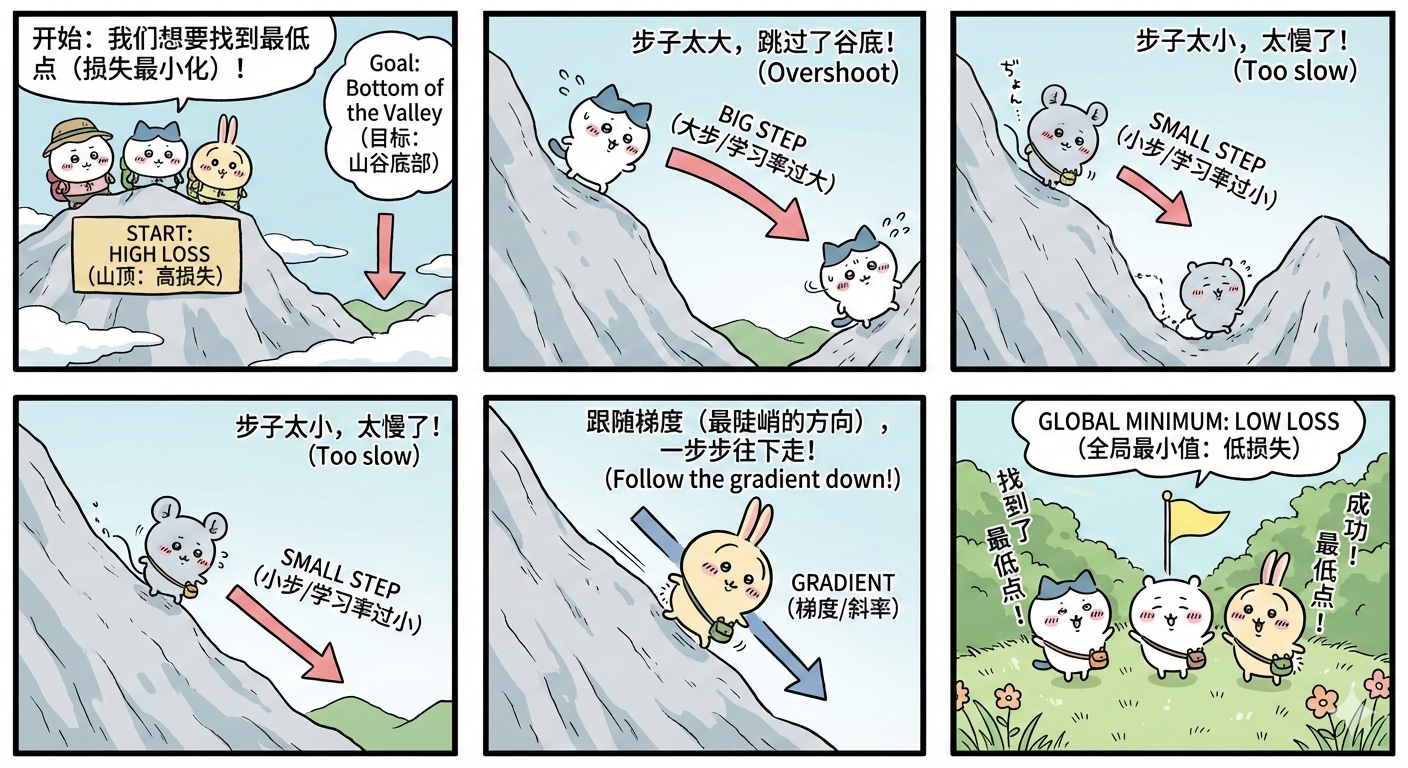

数学更新规则：  
梯度下降通过以下公式不断更新参数：  
w = w - α * ▽L(w, b)  
b = b - α * ▽L(w, b)  
其中  
w：参数  
b：参数  
L(w, b)：损失函数  
▽L(w, b)：损失函数的梯度  
α：学习率  
  



学习率：决定了步长的大小。如果其太大，可能会越过最小值甚至发散；如果太小，收敛会非常慢  
减号的意义：之所以是减去导数，是因为导数指向函数增长最快的方向，我们需要向相反方向移动以至最小化  
收敛速度：梯度下降法，每次迭代时，都会根据当前参数的梯度方向和步长进行参数更新，从而不断接近最小值

生成一些线性数据来演示  
多元线性回归模型：$y = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n + e$  
向量化形式简化表达式：$y = X\theta + e$  
线性回归模型的MSE代价函数：MSE = $\frac{1}{m}\sum_{i=1}^{m}(y_i - \hat{y_i})^2$  
标准方程：$\theta_h = (X^TX)^{-1}X^Ty$  
其中，$\theta_h$为使得代价函数最小的$\theta$值


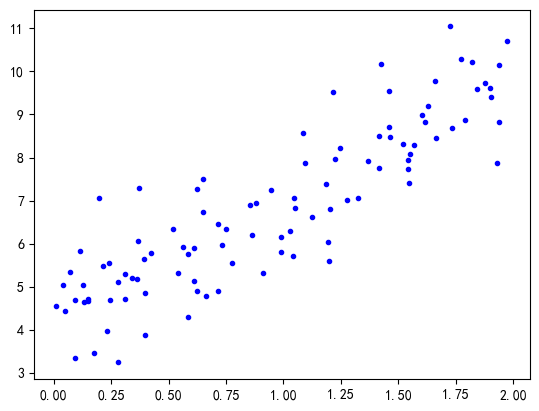

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 适配Mac
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
np.random.seed(42)
m=100
x=2*np.random.rand(m,1)
y=4+3*x+np.random.randn(m,1)#设置的线性方程
plt.plot(x,y,'b.')


首先利用标准方程计算$\theta_h$


In [2]:
from sklearn.preprocessing import add_dummy_feature
X_b=add_dummy_feature(x)
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("最佳参数：",theta_best)

最佳参数： [[4.21509616]
 [2.77011339]]


我们设置的线性方程为$y=4+3x+\epsilon$，其中$\epsilon$为噪声  
可是得到的为：$y=4.215+2.77x+\epsilon$  
接近，但噪声的存在使其无法还原成原来的函数  
用$\theta_h$进行预测

[[4.21509616]
 [9.75532293]]


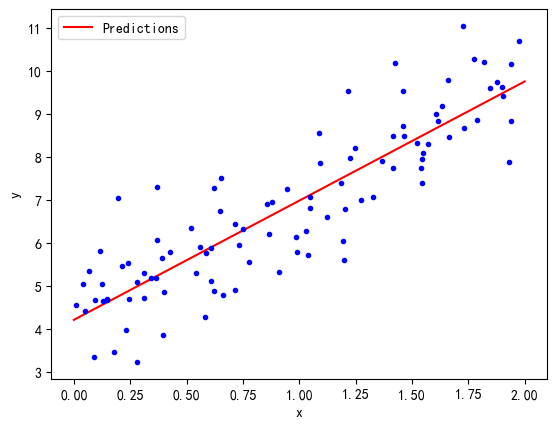

In [5]:
x_new=np.array([[0],[2]])
X_new_b=add_dummy_feature(x_new)
y_predict=X_new_b.dot(theta_best)
print(y_predict)
plt.plot(x_new,y_predict,'r-',label="Predictions")
plt.plot(x,y,'b.')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
#线性回归
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x,y)
reg.intercept_,reg.coef_ #截距和系数
reg.predict(x_new)

array([[4.21509616],
       [9.75532293]])

此时有两种梯度下降方法，可以让我们计算最佳的$\theta$参数

1）批量梯度下降：在更新每一步参数时都要遍历整个训练集,。优点是能直接走向最小值，但处理千万级的大数据时会极慢

代价函数的偏导数：  
代价函数的偏导数用于计算在当前参数值下，代价函数在该点的变化率。  
具体来说，假设代价函数为 $J(w, b)$，其中 $w$ 和 $b$ 是模型的参数，那么 $J(w, b)$ 的偏导数分别为：  
$ \frac{\partial J(w, b)}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)}) x^{(i)} $  
$ \frac{\partial J(w, b)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)}) $  
其中 $m$ 是训练样本的数量，$h_w(x^{(i)})$ 是模型在第 $i$ 个样本上的预测值，$y^{(i)}$ 是第 $i$ 个样本的真实标签。  

代价函数的梯度向量的数学描述如下：

\begin{align}
\nabla_\theta J(\theta) = \frac{1}{m} \sum_{i=1}^m \nabla_\theta \ell(\theta, x^{(i)}, y^{(i)})
\end{align}

其中，$\ell(\theta, x^{(i)}, y^{(i)})$ 是损失函数，$x^{(i)}$ 是第 $i$ 个训练样本，$y^{(i)}$ 是第 $i$ 个训练样本的标签。



梯度下降步骤：  

1）初始化参数 $w$ 和 $b$，通常随机初始化。  

2）计算当前参数下的代价函数值 $J(w, b)$。  

3）计算代价函数的偏导数 $\frac{\partial J(w, b)}{\partial w}$ 和 $\frac{\partial J(w, b)}{\partial b}$。  

4）更新参数 $w$ 和 $b$：  

   $ w := w - \alpha \frac{\partial J(w, b)}{\partial w} $  

   $ b := b - \alpha \frac{\partial J(w, b)}{\partial b} $  

   其中 $\alpha$ 是学习率。  

5）重复步骤 2-4 直到代价函数值收敛或达到最大迭代次数。  


In [8]:
learning_rate=0.1
n_epochs=1000 #批次
m=len(X_b)

np.random.seed(42)
theta=np.random.randn(2,1)

for epoch in range(n_epochs):
    gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-learning_rate*gradients
  
print("梯度下降得到的参数：",theta)

梯度下降得到的参数： [[4.21509616]
 [2.77011339]]


用这种方法和批量梯度下降法得到的参数值是一样的  
现在，让我们探讨我们设定的学习率和批次的影响  


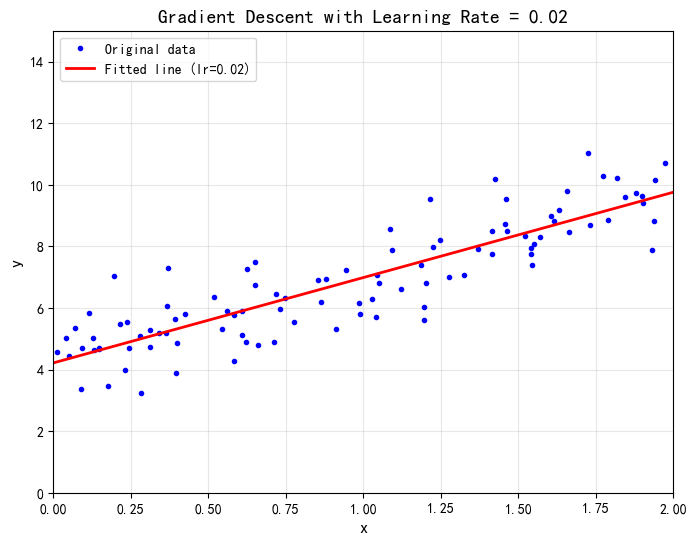

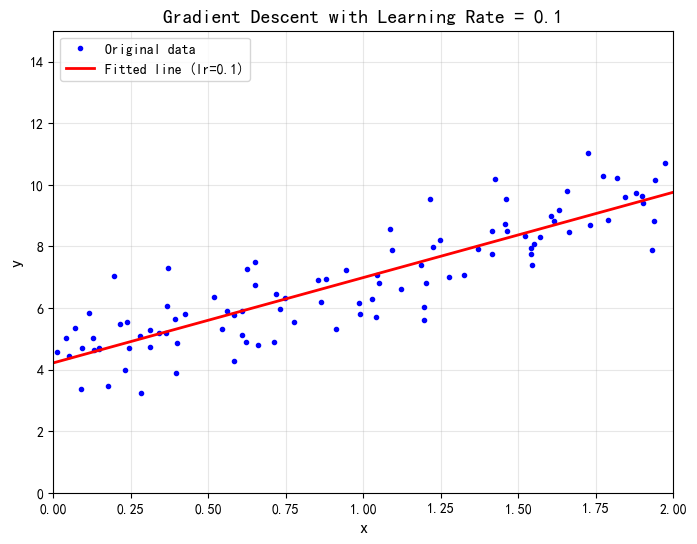

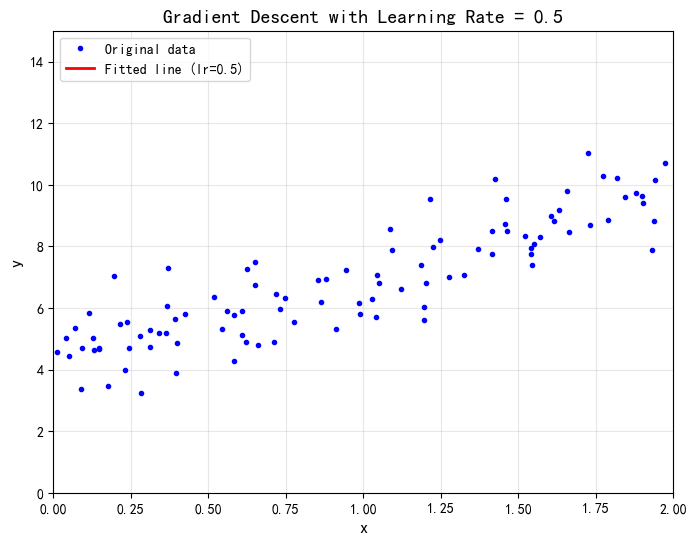

In [22]:


learning_rates = [0.02, 0.1, 0.5]
n_epochs = 1000
m = len(X_b)
np.random.seed(42)
theta_initial = np.random.randn(2, 1)  # 初始参数


for idx, learning_rate in enumerate(learning_rates):
    # 每次都从初始参数重新开始迭代
    theta = theta_initial.copy()
    for epoch in range(n_epochs):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients
    
   
    plt.figure(figsize=(8, 6))  
    # 绘制原始数据点
    plt.plot(x, y, 'b.', label='Original data')
    # 绘制拟合直线
    y_predict = X_new_b.dot(theta)
    plt.plot(x_new, y_predict, 'r-', linewidth=2, label=f'Fitted line (lr={learning_rate})')
    
  
    plt.xlabel("x", fontsize=12)
    plt.ylabel("y", fontsize=12)
    plt.axis([0, 2, 0, 15])
    plt.title(f"Gradient Descent with Learning Rate = {learning_rate}", fontsize=14)
    plt.legend(loc="upper left")
    plt.grid(alpha=0.3)  
    plt.show()  

从结果来看：  
learning_rate=0.02 学习率太低，但最终还是可以找到解决方法，但是需要太长时间   

learning_rate=0.5 学习率太大，结果很差，需要调整学习率    

learning_rate=0.1 学习率正常，结果比较好  

但是我们如何寻找最优学习率呢？这里按下不表（不表2）


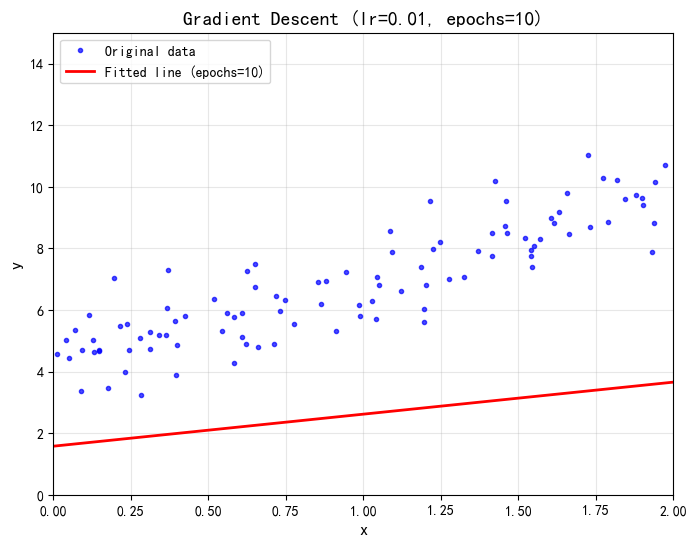

=== Epochs: 10 ===
最终参数 theta (截距, 斜率): [1.57543123 1.03990491]
最终均方误差损失: 20.0603



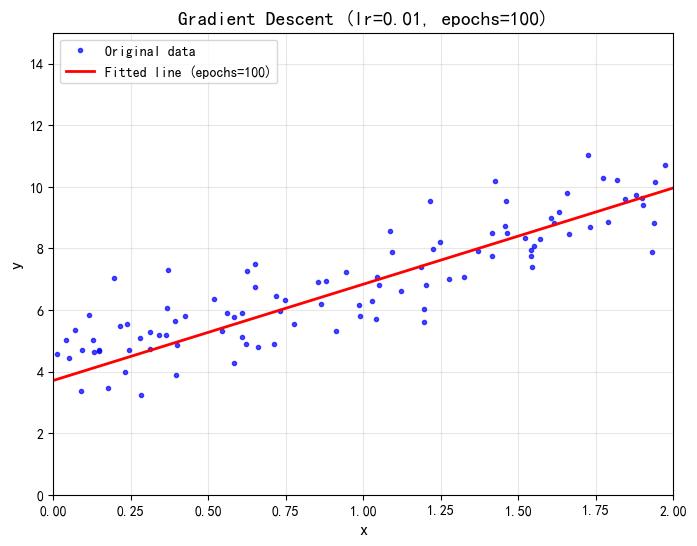

=== Epochs: 100 ===
最终参数 theta (截距, 斜率): [3.70970887 3.12513255]
最终均方误差损失: 0.8802



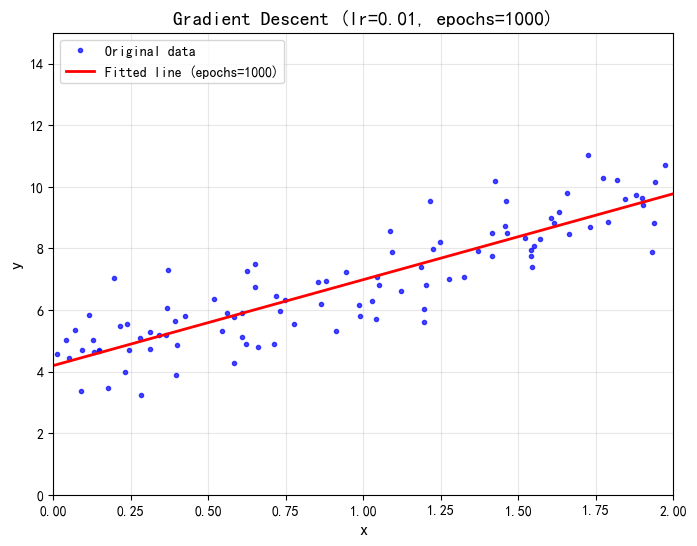

=== Epochs: 1000 ===
最终参数 theta (截距, 斜率): [4.1935218  2.78916237]
最终均方误差损失: 0.8067



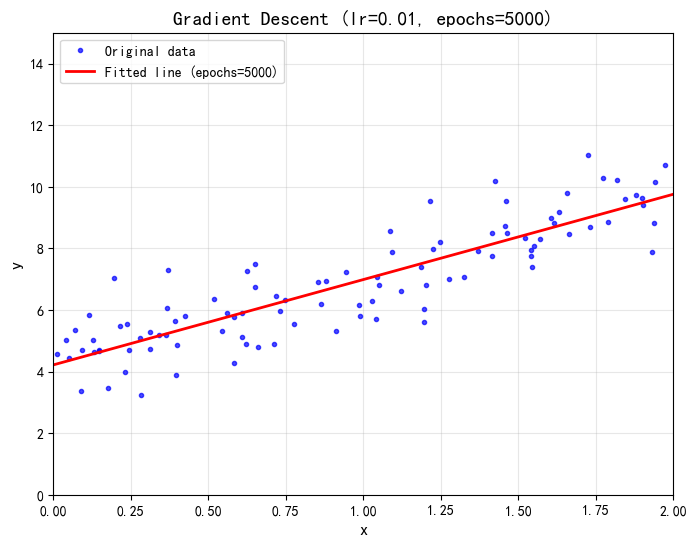

=== Epochs: 5000 ===
最终参数 theta (截距, 斜率): [4.21509613 2.77011341]
最终均方误差损失: 0.8066



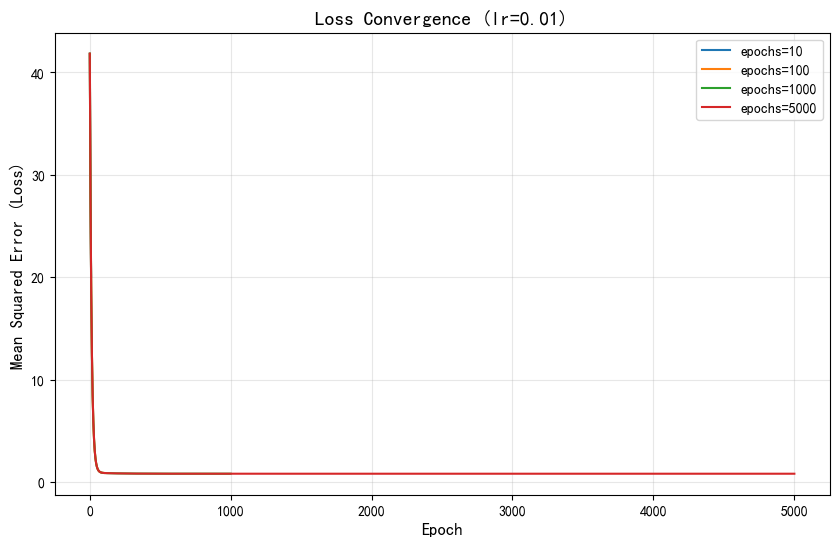

In [23]:

learn_rate = 0.01
n_epochs_list = [10, 100, 1000, 5000]
m = len(X_b)
np.random.seed(42)
theta_initial = np.random.randn(2, 1)  

for n_epochs in n_epochs_list:
    # 每次都从相同的初始参数开始迭代
    theta = theta_initial.copy()
    # 记录每轮的损失值
    loss_history = []
    # 梯度下降迭代
    for epoch in range(n_epochs):
        # 计算梯度（均方误差损失的梯度）
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        # 更新参数
        theta = theta - learn_rate * gradients
        # 计算当前损失
        loss = np.mean((X_b.dot(theta) - y) ** 2)
        loss_history.append(loss)
    plt.figure(figsize=(8, 6))
    # 原始数据点
    plt.plot(x, y, 'b.', label='Original data', alpha=0.7)
    # 拟合直线
    y_predict = X_new_b.dot(theta)
    plt.plot(x_new, y_predict, 'r-', linewidth=2, label=f'Fitted line (epochs={n_epochs})')
    plt.xlabel("x", fontsize=12)
    plt.ylabel("y", fontsize=12)
    plt.axis([0, 2, 0, 15])
    plt.title(f"Gradient Descent (lr={learn_rate}, epochs={n_epochs})", fontsize=14)
    plt.legend(loc="upper left")
    plt.grid(alpha=0.3)
    plt.show()
  
    print(f"=== Epochs: {n_epochs} ===")
    print(f"最终参数 theta (截距, 斜率): {theta.ravel()}")
    print(f"最终均方误差损失: {loss_history[-1]:.4f}\n")

plt.figure(figsize=(10, 6))
for n_epochs in n_epochs_list:
    theta = theta_initial.copy()
    loss_history = []
    for epoch in range(n_epochs):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learn_rate * gradients
        loss = np.mean((X_b.dot(theta) - y) ** 2)
        loss_history.append(loss)
    plt.plot(range(1, n_epochs+1), loss_history, label=f'epochs={n_epochs}')

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Mean Squared Error (Loss)", fontsize=12)
plt.title(f"Loss Convergence (lr={learn_rate})", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

epoch又应该如何设置： 

太低可能离最优解很远就停止    

太高达到最优值，继续迭代，参数不变  

一个简单方法：开设设置较大轮次，当梯度向量的值变得很微小时中断  
其他方法这里按下不表


2）随机梯度下降

每遇到一个样本就立即更新参数  
虽然路径比较杂乱且在最小值附近震荡，但在大数据环境下进度极快

[[4.21076011]
 [2.74856079]]


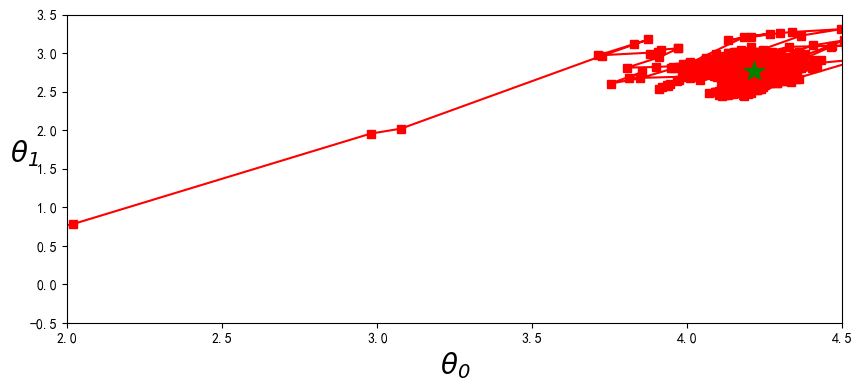

In [ ]:
n_epochs=50
t0,t1=5,50

def learning_rate(t):
    return t0/(t+t1)

np.random.seed(42)
theta=np.random.randn(2,1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_rate(epoch*m+iteration)
        theta=theta-eta*gradients
print(theta)

#可视化随机梯度下降
theta_path=[]
n_epochs=50
m=100
np.random.seed(42)
theta=np.random.randn(2,1)
for epoch in range(n_epochs):
    for iteration in range(m):
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_rate(epoch*m+iteration)
        theta=theta-eta*gradients
        theta_path.append(theta.copy())
theta_path=np.array(theta_path).reshape(-1,2)
plt.figure(figsize=(10,4))
plt.plot(theta_path[:,0],theta_path[:,1],'r-s')
plt.plot(theta_best[0],theta_best[1],'g*',markersize=15)
plt.xlabel(r'$\theta_0$',fontsize=20)
plt.ylabel(r'$\theta_1$',fontsize=20,rotation=0)
plt.axis([2,4.5,-0.5,3.5])
plt.show()

In [28]:
#带有随机梯度下降的线性回归封装在sklearn中
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(x, y.ravel())
sgd_reg.predict([[1.5]])
sgd_reg.intercept_, sgd_reg.coef_


(array([4.19984658]), array([2.73198364]))

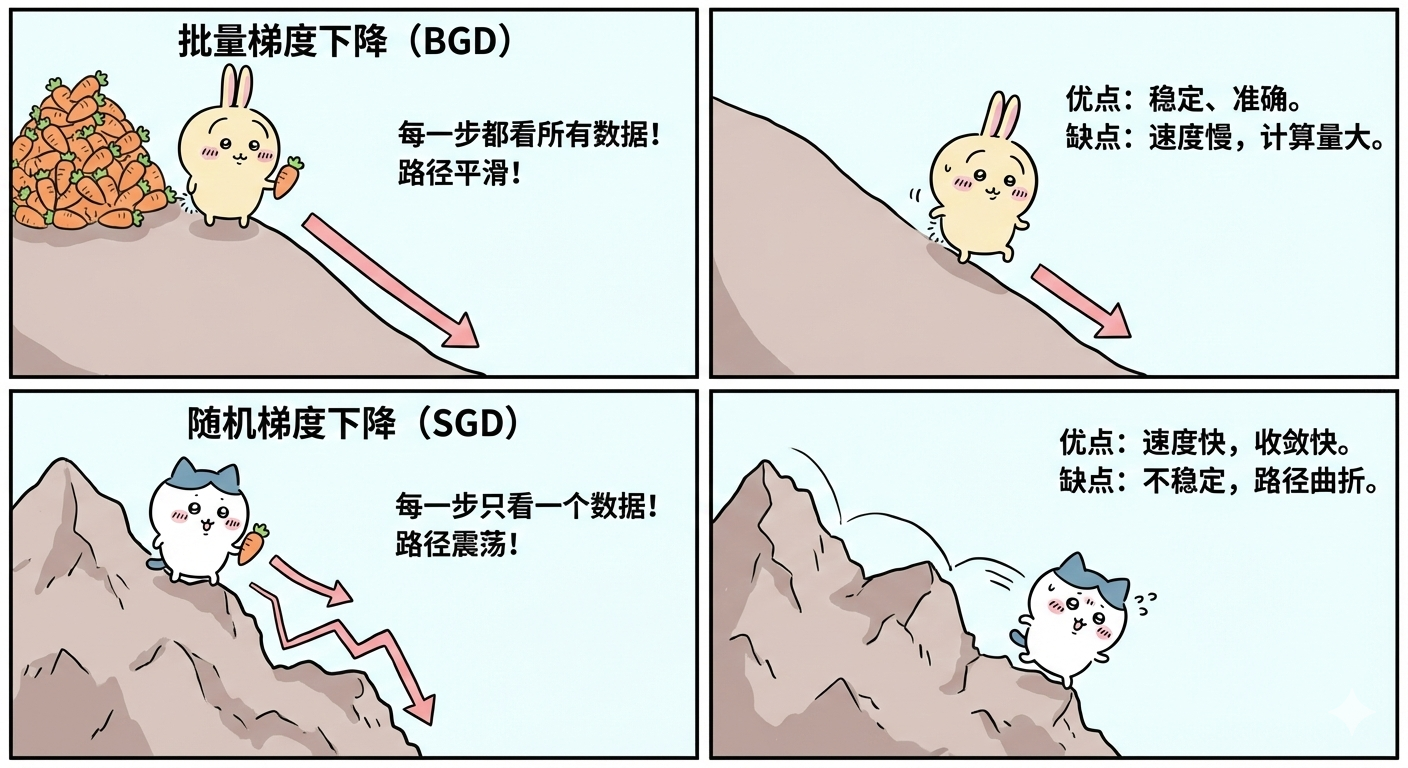